# Exploratory Data Analysis of 

## Table of Contents
1. Introduction
2. Importing Libraries
3. Data Acquisition & Description
4. Data Pre-Processing
5. Data Analysis
6. Regional User Profiles
7. Hypothesis Testing
8.  Conclusion

## 1. Introduction
This section will introduce the purpose and objectives of your analysis, focusing on video game sales.

## 2. Importing Libraries
In this section, we import the necessary libraries for data manipulation, analysis, and visualization. These libraries provide a range of functions that facilitate our exploratory data analysis.

In [28]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from scipy import stats

Reviewer comment v1 remove streamlit since we dont need it. v2 fixed

Student comment correction I have remove streamlit, I thought that I had to recreate this whole project as sprint 4 so thats why I completed the whole process with streamlit, app, requirement, and other config. let me know what else I need to do once you have gotten a chance to review the work.

## 3. Data Acquisition & Description

### 3.1 Reading CSV File: Load your video game sales dataset.

In [29]:
games = pd.read_csv(r'C:\Users\James\Project_games\games.csv')

### 3.2 Overview of the Dataset: Display the first few rows, shape, and data types. Provide a brief description of each column.

In [30]:
games

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


In [31]:
games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [32]:
games.columns

Index(['Name', 'Platform', 'Year_of_Release', 'Genre', 'NA_sales', 'EU_sales',
       'JP_sales', 'Other_sales', 'Critic_Score', 'User_Score', 'Rating'],
      dtype='object')

In [33]:
games.describe().T

,count,mean,std,min,25%,50%,75%,max
Year_of_Release,16446.0,2006.484616,5.877050,1980.0,2003.0,2007.00,2010.00,2016.00
NA_sales,16715.0,0.263377,0.813604,0.0,0.0,0.08,0.24,41.36
EU_sales,16715.0,0.145060,0.503339,0.0,0.0,0.02,0.11,28.96
JP_sales,16715.0,0.077617,0.308853,0.0,0.0,0.00,0.04,10.22
Other_sales,16715.0,0.047342,0.186731,0.0,0.0,0.01,0.03,10.57
Critic_Score,8137.0,68.967679,13.938165,13.0,60.0,71.00,79.00,98.00


In [34]:
games.dtypes

Name                object
Platform            object
Year_of_Release    float64
Genre               object
NA_sales           float64
EU_sales           float64
JP_sales           float64
Other_sales        float64
Critic_Score       float64
User_Score          object
Rating              object
dtype: object

In [35]:
games.shape

(16715, 11)

Reviewer's comment v2
Super

## 4. Data Pre-Processing

### 4.1. Handling Missing Values and Data Types: Address missing values, convert data types, and deal with 'TBD' values.

In [36]:
games.isnull().sum()

Name                  2
Platform              0
Year_of_Release     269
Genre                 2
NA_sales              0
EU_sales              0
JP_sales              0
Other_sales           0
Critic_Score       8578
User_Score         6701
Rating             6766
dtype: int64

In [37]:
print(games.columns)


Index(['Name', 'Platform', 'Year_of_Release', 'Genre', 'NA_sales', 'EU_sales',
       'JP_sales', 'Other_sales', 'Critic_Score', 'User_Score', 'Rating'],
      dtype='object')


In [38]:
games.dropna(subset=['Year_of_Release', 'Genre', 'Name'], inplace=True)

games['Year_of_Release'] = games['Year_of_Release'].astype(int)

games['Rating'].fillna('Unknown', inplace=True)

games['Genre'] = games['Genre'].astype('category')
games['Platform'] = games['Platform'].astype('category')
games['Rating'] = games['Rating'].astype('category')

games['total_sales'] = games[['NA_sales', 'EU_sales', 'JP_sales', 'Other_sales']].sum(axis=1)

Reviewer's comment v2
We are unable to fill in missing values for user_score as this is individual to each game and using an average across the entire dataset may lead to incorrect analysis results. Please leave Nans in this column The same for critic score
For year_of_release, genre and name it is better to drop NaNs
In Rating it is better to fill values wiht "Unknown" that we will have right information about user profile after and will not loose a lot of data

Student Comment v2
1. drops the rows with NaNs in Year_of_relase, genre, and name columns.
2. convert year of relase to integer
3. fill missing values in rating
4. convert data types for categorical columns
5. calculate total sales 

### 4.2. Adding New Columns: Calculate total sales for each game.

## 5. Data Analysis

### 5.1 Game Release Trends

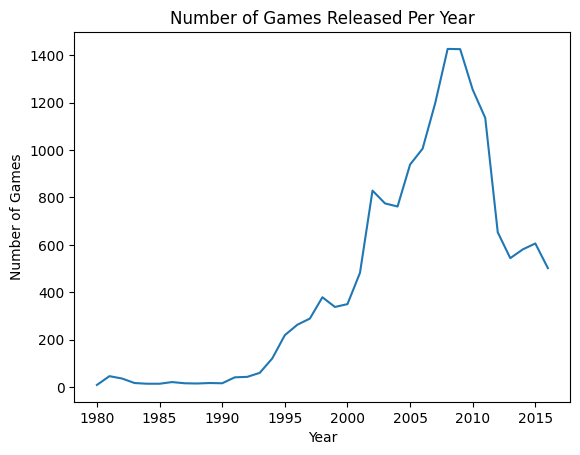

In [39]:
games_per_year = games.groupby('Year_of_Release')['Name'].count()
games_per_year.plot(kind='line')
plt.title('Number of Games Released Per Year')
plt.xlabel('Year')
plt.ylabel('Number of Games')
plt.show()

### Industry see fluctuations in the number of games released over the years, possibly correlated with technological innovation and platform transitions. 

### 5.2 Sales Variations Across Platforms
Group by platform and sum up the total sales

In [40]:
platform_sales = games.groupby('Platform')['total_sales'].sum().sort_values(ascending=False)
print(platform_sales)

Platform
PS2     1233.56
X360     961.24
PS3      931.34
Wii      891.18
DS       802.78
PS       727.58
PS4      314.14
GBA      312.88
PSP      289.53
3DS      257.81
PC       255.76
GB       254.43
XB       251.57
NES      251.05
N64      218.01
SNES     200.04
GC       196.73
XOne     159.32
2600      86.48
WiiU      82.19
PSV       53.81
SAT       33.59
GEN       28.35
DC        15.95
SCD        1.86
NG         1.44
WS         1.42
TG16       0.16
3DO        0.10
GG         0.04
PCFX       0.03
Name: total_sales, dtype: float64


C:\Users\James\AppData\Local\Temp\ipykernel_36464\4143711789.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  platform_sales = games.groupby('Platform')['total_sales'].sum().sort_values(ascending=False)


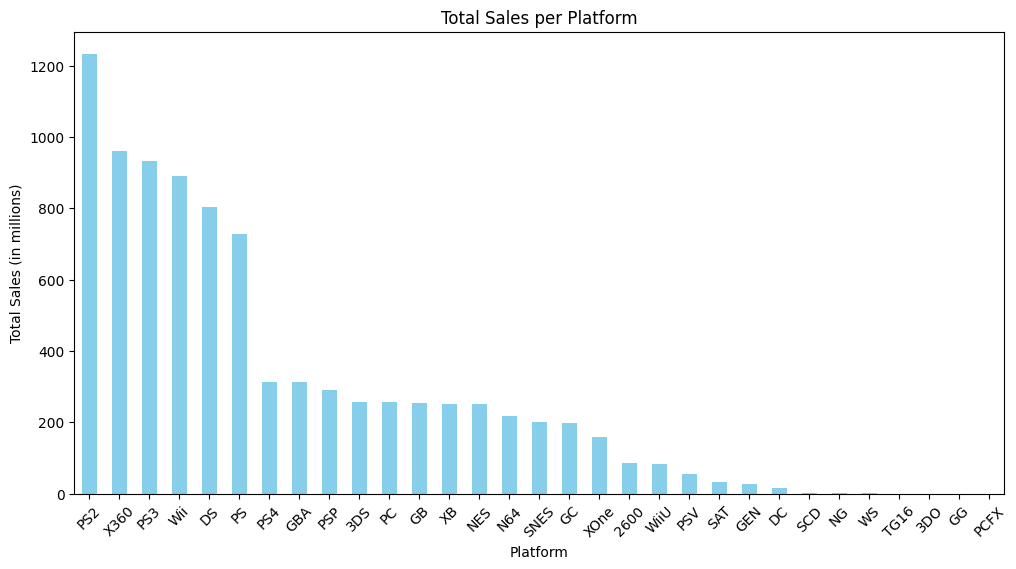

In [41]:
plt.figure(figsize=(12, 6))
platform_sales.plot(kind='bar', color='skyblue')
plt.title('Total Sales per Platform')
plt.xlabel('Platform')
plt.ylabel('Total Sales (in millions)')
plt.xticks(rotation=45)
plt.show()

### Sales variations across platforms. the bar chart showcase total sales per platform indicated a clear hierachy in platform populartiy. specifically the PS2

### 5.3 Platform Life Cycles

Plotting the platform life cycles

In [42]:
platform_yearly_sales = games.pivot_table(index='Year_of_Release', columns='Platform', values='total_sales', aggfunc='sum')

platform_yearly_sales.fillna(0, inplace=True)

print(platform_yearly_sales)


Platform          2600   3DO    3DS    DC      DS     GB    GBA     GC    GEN  \
Year_of_Release                                                                 
1980             11.38  0.00   0.00  0.00    0.00   0.00   0.00   0.00   0.00   
1981             35.68  0.00   0.00  0.00    0.00   0.00   0.00   0.00   0.00   
1982             28.88  0.00   0.00  0.00    0.00   0.00   0.00   0.00   0.00   
1983              5.84  0.00   0.00  0.00    0.00   0.00   0.00   0.00   0.00   
1984              0.27  0.00   0.00  0.00    0.00   0.00   0.00   0.00   0.00   
1985              0.45  0.00   0.00  0.00    0.02   0.00   0.00   0.00   0.00   
1986              0.67  0.00   0.00  0.00    0.00   0.00   0.00   0.00   0.00   
1987              1.94  0.00   0.00  0.00    0.00   0.00   0.00   0.00   0.00   
1988              0.74  0.00   0.00  0.00    0.00   1.43   0.00   0.00   0.00   
1989              0.63  0.00   0.00  0.00    0.00  64.97   0.00   0.00   0.00   
1990              0.00  0.00

### Platform life cycle the line graphy depicts yearly sales per platform and show the rise and fall of each one. Specially the Wii and PS2 with declining after hitting record sales.

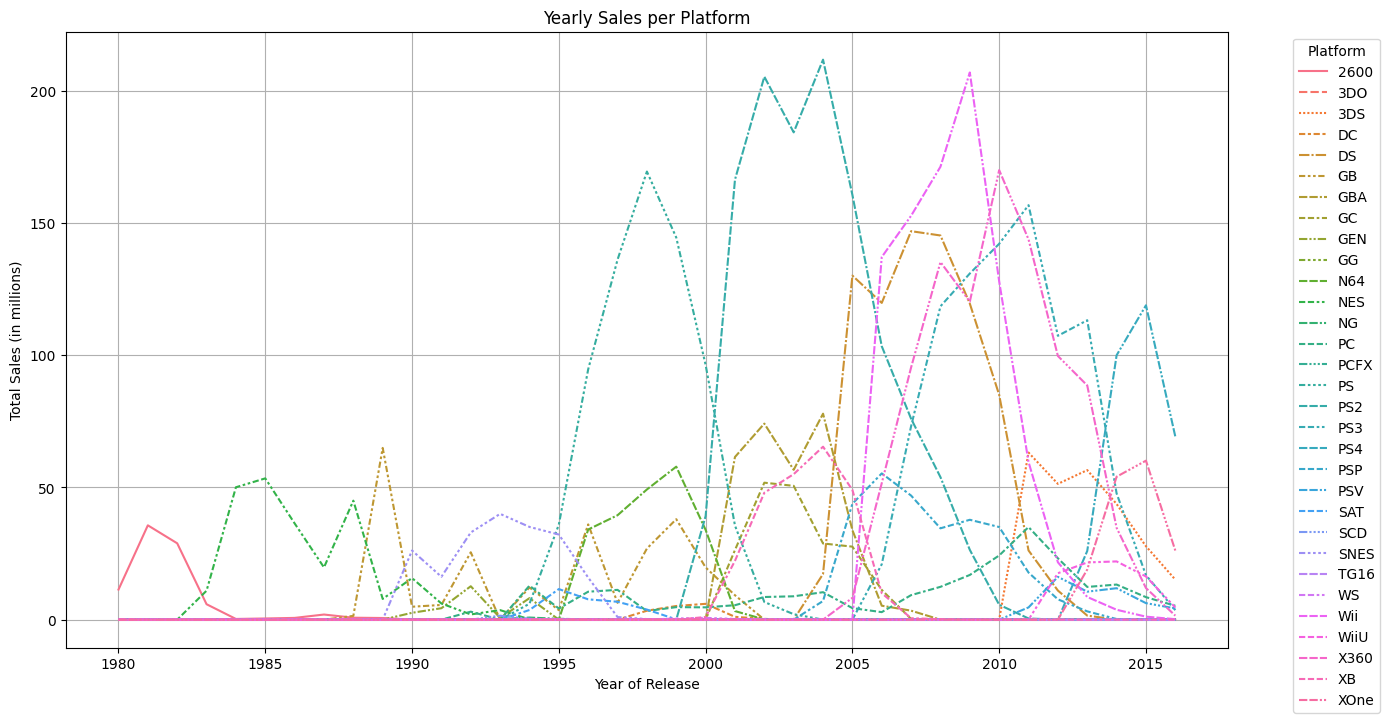

In [43]:
plt.figure(figsize=(15, 8))
sns.lineplot(data=platform_yearly_sales)
plt.title('Yearly Sales per Platform')
plt.xlabel('Year of Release')
plt.ylabel('Total Sales (in millions)')
plt.legend(title='Platform', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.show()

### 5.4 Global Sales Analysis
Total Sales by Region
Sales Trend Over Time
Comparing Sales Between Region

In [44]:
total_sales_na = games['NA_sales'].sum()
total_sales_eu = games['EU_sales'].sum()
total_sales_jp = games['JP_sales'].sum()
total_sales_other = games['Other_sales'].sum()

print(f"Total Sales in North America: {total_sales_na} million")
print(f"Total Sales in Europe: {total_sales_eu} million")
print(f"Total Sales in Japan: {total_sales_jp} million")
print(f"Total Sales in Other Regions: {total_sales_other} million")

Total Sales in North America: 4341.42 million
Total Sales in Europe: 2399.6800000000003 million
Total Sales in Japan: 1290.6399999999999 million
Total Sales in Other Regions: 782.63 million


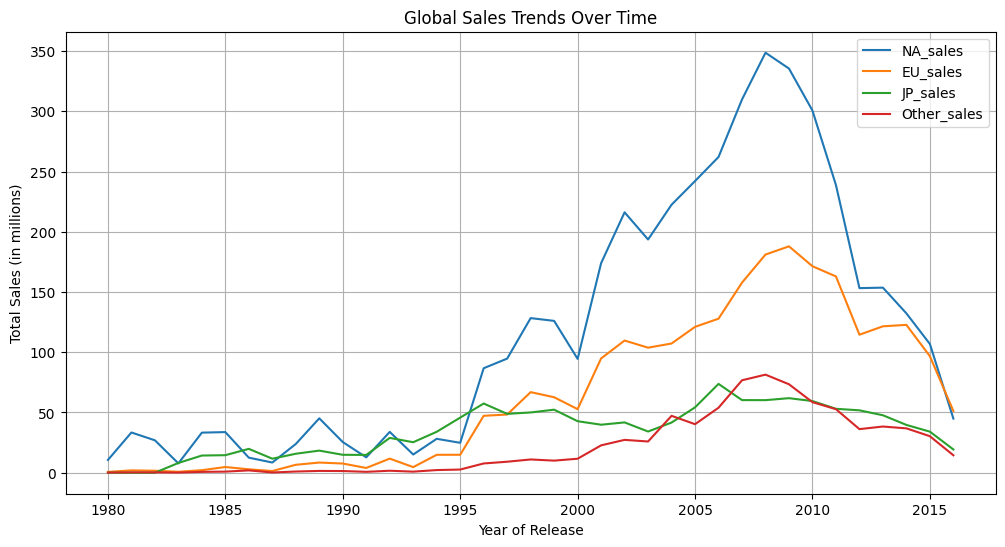

In [45]:
yearly_sales = games.groupby('Year_of_Release').agg({
    'NA_sales': 'sum',
    'EU_sales': 'sum',
    'JP_sales': 'sum',
    'Other_sales': 'sum'
})

yearly_sales.plot(figsize=(12, 6))
plt.title('Global Sales Trends Over Time')
plt.xlabel('Year of Release')
plt.ylabel('Total Sales (in millions)')
plt.grid(True)
plt.show()

### Global Sales Analysis sales trend over time showed significant regional differences with North America an Europe being the largest markets. Peak sales areound mid 2000 to early 2010. 

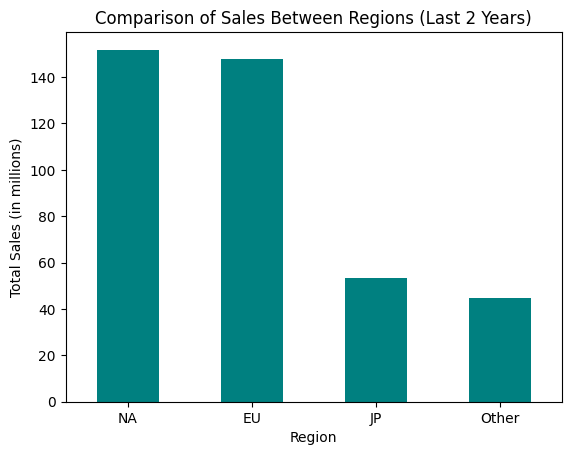

In [46]:
latest_year = 2016
years_to_include = 2  

recent_games = games[games['Year_of_Release'] > (latest_year - years_to_include)]

total_sales_na_recent = recent_games['NA_sales'].sum()
total_sales_eu_recent = recent_games['EU_sales'].sum()
total_sales_jp_recent = recent_games['JP_sales'].sum()
total_sales_other_recent = recent_games['Other_sales'].sum()

region_sales_recent = pd.DataFrame({
    'Region': ['NA', 'EU', 'JP', 'Other'],
    'Total Sales': [total_sales_na_recent, total_sales_eu_recent, total_sales_jp_recent, total_sales_other_recent]
})

region_sales_recent.plot(x='Region', y='Total Sales', kind='bar', legend=False, color='teal')
plt.title('Comparison of Sales Between Regions (Last 2 Years)')
plt.xlabel('Region')
plt.ylabel('Total Sales (in millions)')
plt.xticks(rotation=0)
plt.show()

Reviewer's comment v2
Before newt steps you need to choose and filter data for relevant period for the analysis
Please remember that it is uncommon to use data for more than 2-3 years when forecasting next year's sales, even in case of traditional businesses. And in the dynamic computer games industry, taking longer time intervals should be avoided as it will definitely lead to tracking some obsolete trends. But you shouldn't take too short a period either.
Please filter data by choosing right year_of_release After the correction you will have another results of analysis So please change conclusions if it is necessary I will check only correctness of the code

Student comment v2 revising to the latest year of 2016 with a years to include to 2. recalculating sales based on time frame. and creating a new bar chart

### 5.5 User and Critic Review Analysis
Analyzing the Relationship Between User Scores and Total Sales
Analyzing the Relationship Between Critic Scores and Total Sales
Correlation Analysis Testing to see the strenght of the relationship between scores and sales

Reviewer's comment v2
Here you need to choose one game and check correlation for it For example for PS4 Dont forget to use data only for relevant period

Student comment v2 Filtering to include games for just ps4 and change the time frame to be the only last 2 years for this correlation analysis.

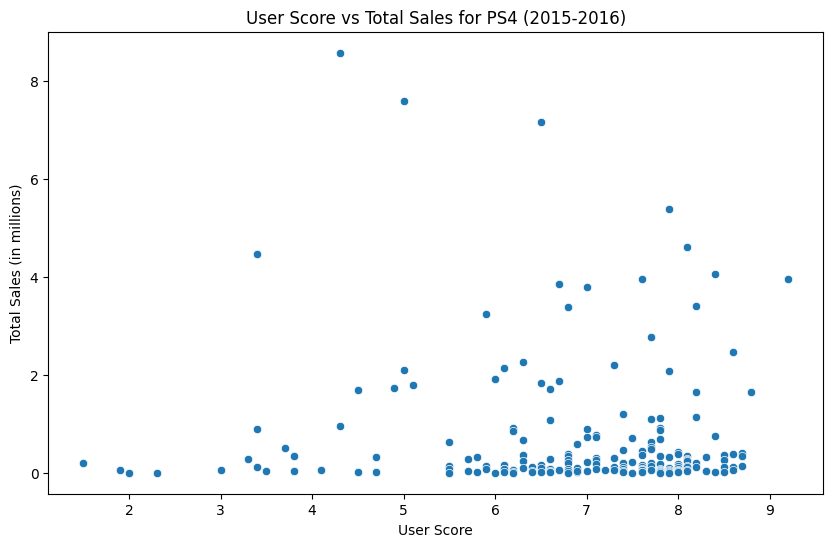

Correlation between User Score and Total Sales for PS4 (2015-2016): -0.0597384571263821


In [47]:
games['User_Score'] = games['User_Score'].replace('tbd', np.nan).astype(float)

filtered_games = games[(games['Platform'] == 'PS4') & 
                       (games['Year_of_Release'] >= 2015) & 
                       (games['Year_of_Release'] <= 2016)]

filtered_games = filtered_games.dropna(subset=['User_Score'])

plt.figure(figsize=(10, 6))
sns.scatterplot(data=filtered_games, x='User_Score', y='total_sales')
plt.title('User Score vs Total Sales for PS4 (2015-2016)')
plt.xlabel('User Score')
plt.ylabel('Total Sales (in millions)')
plt.show()

user_score_corr = filtered_games['User_Score'].corr(filtered_games['total_sales'])
print(f'Correlation between User Score and Total Sales for PS4 (2015-2016): {user_score_corr}')

### User and critic's reviews using scatter plots that if you have a higher score you typically gurantee higher sales, also due to loyalty, marketing, and platform exclusivity 

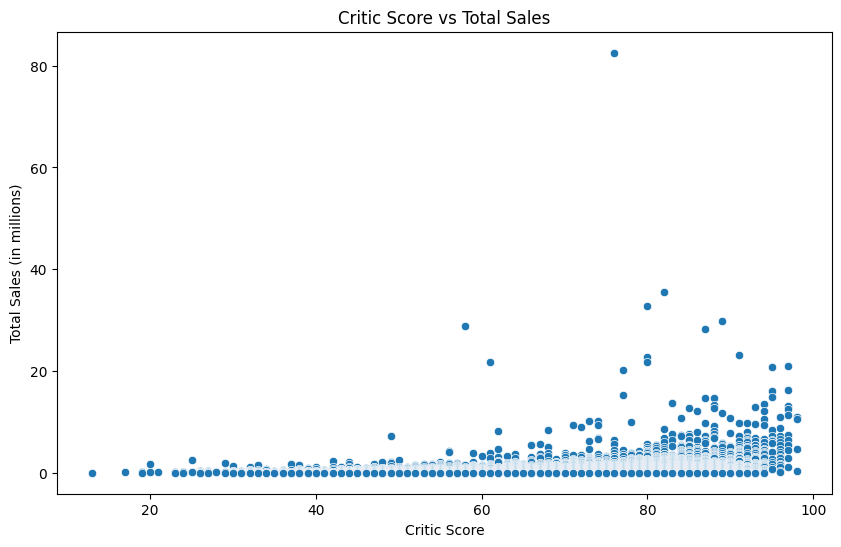

In [48]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=games, x='Critic_Score', y='total_sales')
plt.title('Critic Score vs Total Sales')
plt.xlabel('Critic Score')
plt.ylabel('Total Sales (in millions)')
plt.show()

In [49]:
user_score_corr = games['User_Score'].corr(games['total_sales'])
critic_score_corr = games['Critic_Score'].corr(games['total_sales'])

print(f'Correlation between User Score and Total Sales: {user_score_corr}')
print(f'Correlation between Critic Score and Total Sales: {critic_score_corr}')

Correlation between User Score and Total Sales: 0.08798399271321646
Correlation between Critic Score and Total Sales: 0.24534884547411373


### 5.6 Comparative Analysis by Genre and Platform
Creating a Pivot Table for Sales by Genre and Platform
Heatmap Visualization
Bar Chart

In [50]:
genre_platform_sales = games.pivot_table(index='Genre', columns='Platform', values='total_sales', aggfunc='sum', fill_value=0)

print(genre_platform_sales)

Platform       2600   3DO    3DS    DC      DS     GB    GBA     GC    GEN  \
Genre                                                                        
Action        26.31  0.00  57.84  1.26  111.31   7.93  54.13  37.11   2.74   
Adventure      0.40  0.06   4.83  2.50   45.83  17.15  12.23   5.93   0.19   
Fighting       0.77  0.00  10.56  1.83    7.08   0.00   4.16  18.43   5.89   
Misc           3.57  0.00  10.99  0.00  135.56  13.35  36.09  16.44   0.03   
Platform      13.26  0.00  32.53  2.53   75.80  53.88  77.99  28.59  15.44   
Puzzle        13.67  0.02   5.57  0.00   82.09  47.47  11.99   4.56   0.00   
Racing         2.32  0.00  14.87  2.65   37.96   4.55  18.81  21.77   0.26   
Role-Playing   0.00  0.00  84.20  0.68  124.17  88.24  64.20  13.04   0.27   
Shooter       22.96  0.00   1.22  0.33    7.86   1.19   3.56  13.61   0.13   
Simulation     0.44  0.02  26.96  0.52  129.58   3.55   5.94   8.61   0.00   
Sports         2.78  0.00   6.15  3.65   31.27   9.06  16.32  24

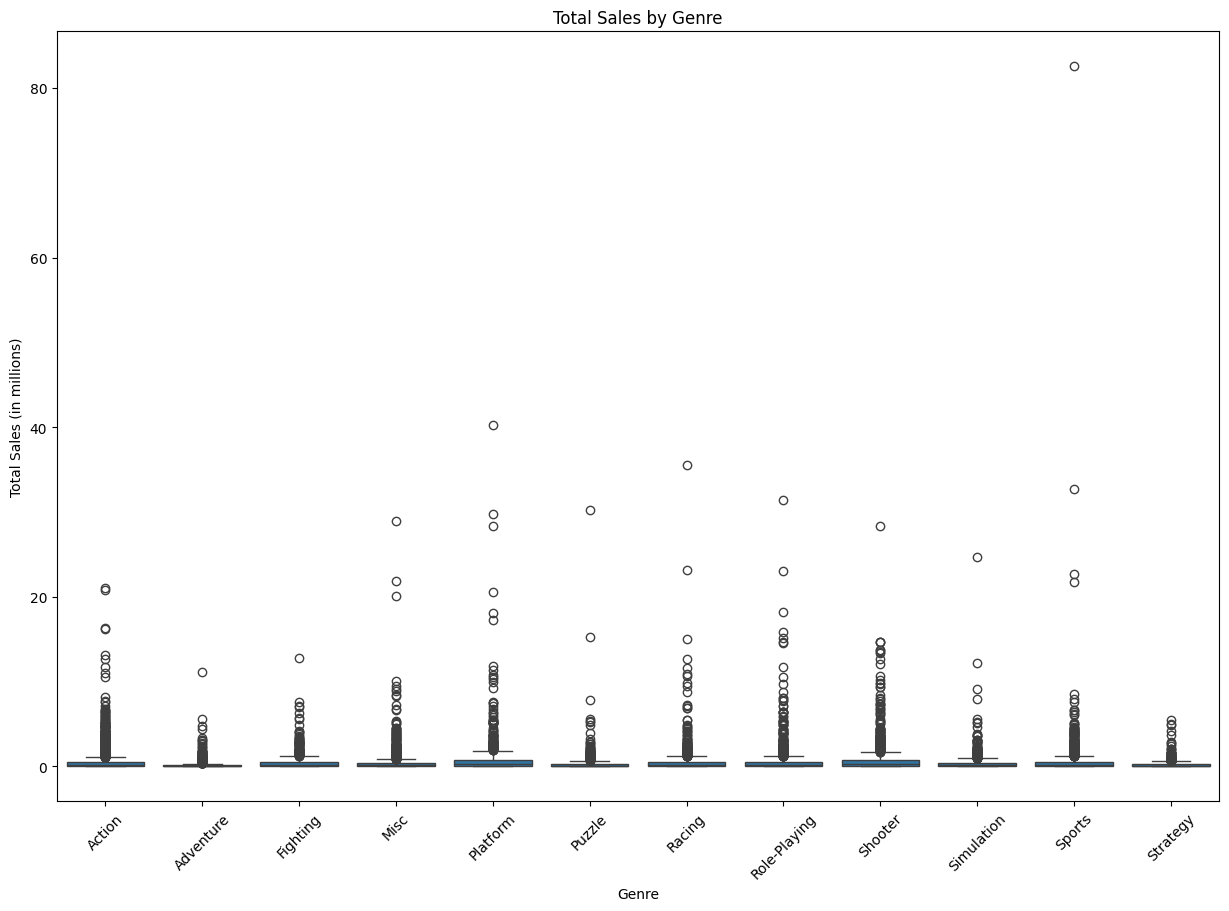

In [51]:
plt.figure(figsize=(15, 10))
sns.boxplot(data=games, x='Genre', y='total_sales')
plt.title('Total Sales by Genre')
plt.xlabel('Genre')
plt.ylabel('Total Sales (in millions)')
plt.xticks(rotation=45)
plt.show()

Reviewer's comment v2
Please add the boxplot for total sales broken by genres for relevant data

Student comment v2 boxplot added to help understand distribution of sales within each genre and identify outliers.

### This helps developer to target which area for greater sales based on genre

## 6. Regional User Profiles

### 6.1 Top Platforms and Genres by Region
1. North America 
2. Europe
3. Japan

In [52]:
top_genres_na = games.groupby('Genre')['NA_sales'].sum().sort_values(ascending=False).head(5)
print("Top Genres in North America:\n", top_genres_na)

top_genres_eu = games.groupby('Genre')['EU_sales'].sum().sort_values(ascending=False).head(5)
print("\nTop Genres in Europe:\n", top_genres_eu)

top_genres_jp = games.groupby('Genre')['JP_sales'].sum().sort_values(ascending=False).head(5)
print("\nTop Genres in Japan:\n", top_genres_jp)


Top Genres in North America:
 Genre
Action      863.17
Sports      671.20
Shooter     584.83
Platform    444.44
Misc        399.57
Name: NA_sales, dtype: float64

Top Genres in Europe:
 Genre
Action     510.99
Sports     371.33
Shooter    314.52
Racing     234.49
Misc       210.60
Name: EU_sales, dtype: float64

Top Genres in Japan:
 Genre
Role-Playing    353.39
Action          160.14
Sports          134.93
Platform        130.71
Misc            107.02
Name: JP_sales, dtype: float64


C:\Users\James\AppData\Local\Temp\ipykernel_36464\1428827593.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  top_genres_na = games.groupby('Genre')['NA_sales'].sum().sort_values(ascending=False).head(5)
C:\Users\James\AppData\Local\Temp\ipykernel_36464\1428827593.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  top_genres_eu = games.groupby('Genre')['EU_sales'].sum().sort_values(ascending=False).head(5)
C:\Users\James\AppData\Local\Temp\ipykernel_36464\1428827593.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=Fal

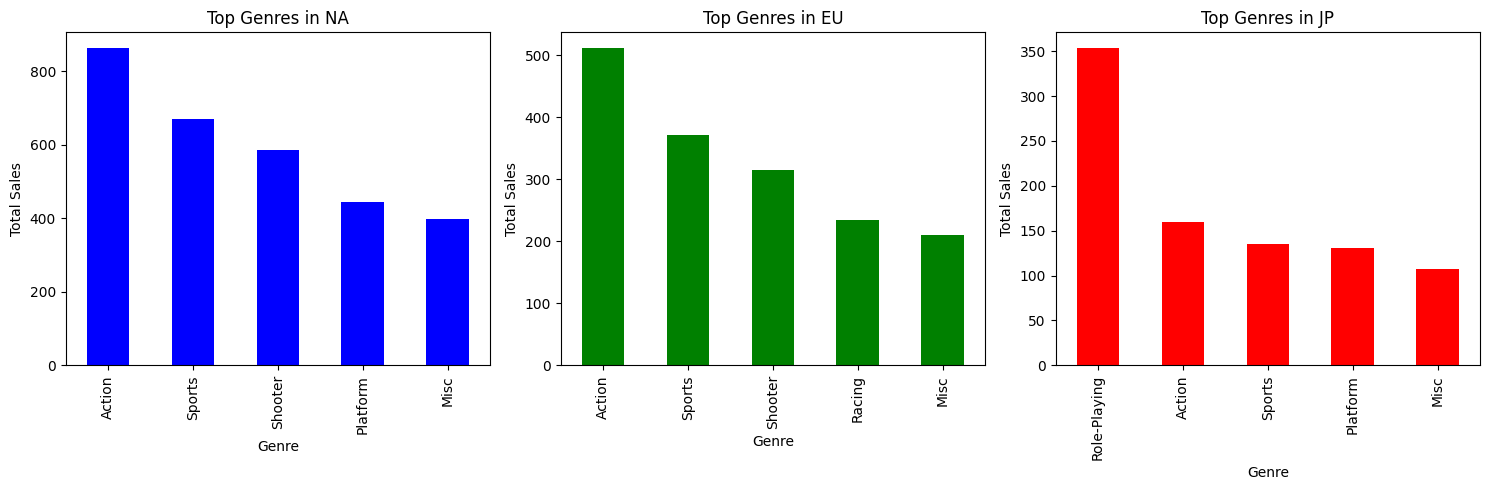

NameError: name 'top_platforms_na' is not defined

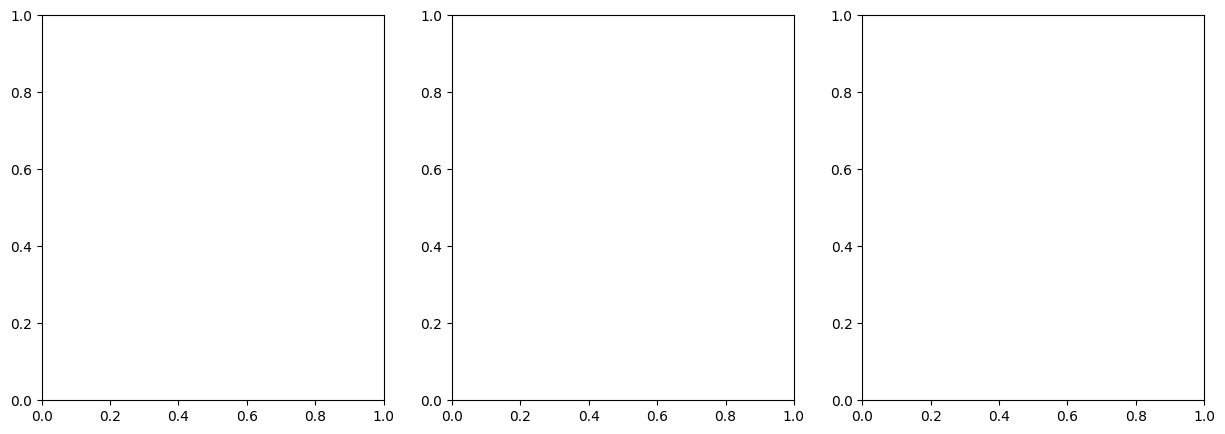

In [53]:
fig, axs = plt.subplots(1, 3, figsize=(15, 5))

top_genres_na.plot(kind='bar', ax=axs[0], color='blue').set_title('Top Genres in NA')
top_genres_eu.plot(kind='bar', ax=axs[1], color='green').set_title('Top Genres in EU')
top_genres_jp.plot(kind='bar', ax=axs[2], color='red').set_title('Top Genres in JP')

for ax in axs:
    ax.set_xlabel('Genre')
    ax.set_ylabel('Total Sales')

plt.tight_layout()
plt.show()

fig, axs = plt.subplots(1, 3, figsize=(15, 5))

top_platforms_na.plot(kind='bar', ax=axs[0], color='blue')
axs[0].set_title('Top Platforms in NA')
axs[0].set_xlabel('Platform')
axs[0].set_ylabel('Total Sales (in millions)')

top_platforms_eu.plot(kind='bar', ax=axs[1], color='green')
axs[1].set_title('Top Platforms in EU')
axs[1].set_xlabel('Platform')
axs[1].set_ylabel('Total Sales (in millions)')

top_platforms_jp.plot(kind='bar', ax=axs[2], color='red')
axs[2].set_title('Top Platforms in JP')
axs[2].set_xlabel('Platform')
axs[2].set_ylabel('Total Sales (in millions)')

plt.tight_layout()
plt.show()

Reviewer's comment v2 Conclusion is correct
Reviewer's comment v2
I can not see barcharts for platforms Please fix it

### This shows that sports and action genres work better in NA and EU while role-playing games have strenght in Japan

### Second barchart shows which system is more popular in each region

### 6.2 Impact of ESRB Ratings on Sales
1. Grouping by ESRB rating and calculating total sales for North America, Europe, and Japan

In [ ]:
esrb_sales = games.groupby('Rating')['total_sales'].sum().sort_values(ascending=False)

print(esrb_sales)

Rating
Unknown    2822.10
E          2407.61
T          1473.08
M          1462.53
E10+        640.98
K-A           4.32
AO            1.96
EC            1.75
RP            0.04
Name: total_sales, dtype: float64


C:\Users\James\AppData\Local\Temp\ipykernel_13092\3572108299.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  esrb_sales = games.groupby('Rating')['total_sales'].sum().sort_values(ascending=False)


In [ ]:
esrb_na_sales = games.groupby('Rating')['NA_sales'].sum().sort_values(ascending=False)

esrb_eu_sales = games.groupby('Rating')['EU_sales'].sum().sort_values(ascending=False)

esrb_jp_sales = games.groupby('Rating')['JP_sales'].sum().sort_values(ascending=False)

C:\Users\James\AppData\Local\Temp\ipykernel_13092\2306338197.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  esrb_na_sales = games.groupby('Rating')['NA_sales'].sum().sort_values(ascending=False)
C:\Users\James\AppData\Local\Temp\ipykernel_13092\2306338197.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  esrb_eu_sales = games.groupby('Rating')['EU_sales'].sum().sort_values(ascending=False)
C:\Users\James\AppData\Local\Temp\ipykernel_13092\2306338197.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain c

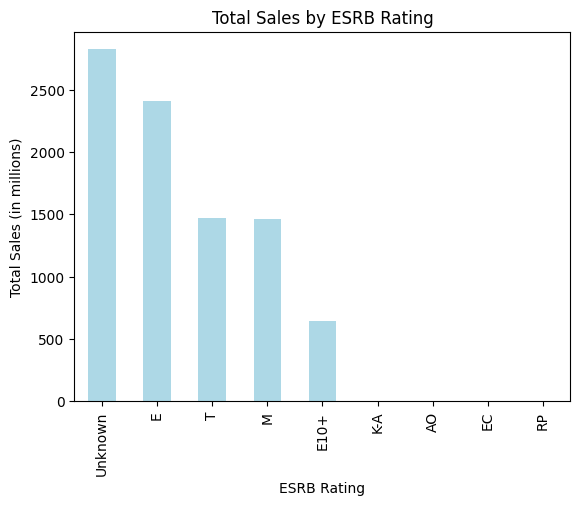

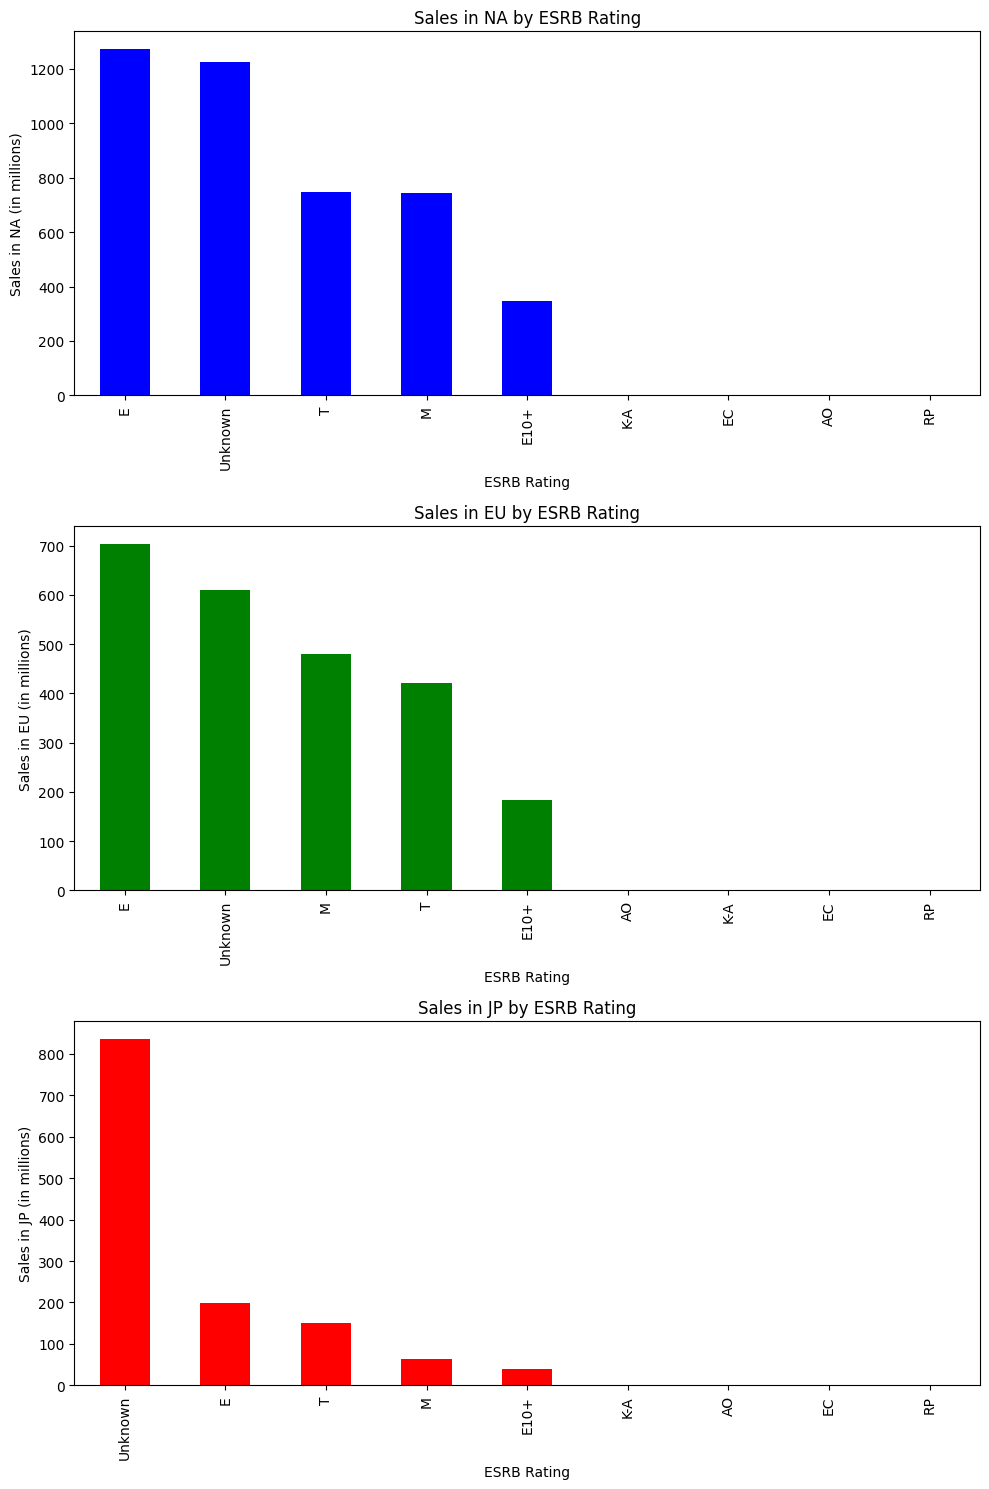

In [ ]:
esrb_sales.plot(kind='bar', color='lightblue')
plt.title('Total Sales by ESRB Rating')
plt.xlabel('ESRB Rating')
plt.ylabel('Total Sales (in millions)')
plt.show()

fig, axs = plt.subplots(3, 1, figsize=(10, 15))

esrb_na_sales.plot(kind='bar', ax=axs[0], color='blue')
axs[0].set_title('Sales in NA by ESRB Rating')
axs[0].set_xlabel('ESRB Rating')
axs[0].set_ylabel('Sales in NA (in millions)')

esrb_eu_sales.plot(kind='bar', ax=axs[1], color='green')
axs[1].set_title('Sales in EU by ESRB Rating')
axs[1].set_xlabel('ESRB Rating')
axs[1].set_ylabel('Sales in EU (in millions)')

esrb_jp_sales.plot(kind='bar', ax=axs[2], color='red')
axs[2].set_title('Sales in JP by ESRB Rating')
axs[2].set_xlabel('ESRB Rating')
axs[2].set_ylabel('Sales in JP (in millions)')

plt.tight_layout()
plt.show()


### This really depends on region to show what is the perfence of the market and demographics that are playing on the system. 

## 7. Hypothesis Testing

### 7.1. Average User Ratings Comparison: Xbox One vs. PC, and Action vs. Sports genres.

In [ ]:
action_ratings = games[(games['Genre'] == 'Action') & games['User_Score'].notna()]['User_Score']
sports_ratings = games[(games['Genre'] == 'Sports') & games['User_Score'].notna()]['User_Score']
t_stat_genre, p_value_genre = stats.ttest_ind(action_ratings, sports_ratings)
print(f'T-statistic for Genre: {t_stat_genre}, P-value for Genre: {p_value_genre}')

T-statistic for Genre: 1.8472797735322193, P-value for Genre: 0.06480928064420527


For Xbox One vs. PC:
H0 (Null Hypothesis): There is no difference between the average user scores for Xbox One and PC games.
H1 (Alternative Hypothesis): There is a difference between the average user scores for Xbox One and PC games.

For Action vs. Sports genres:
H0 (Null Hypothesis): There is no difference between the average user scores for Action and Sports genres.
H1 (Alternative Hypothesis): There is a difference between the average user scores for Action and Sports genres.

After conducting the t-test for pvalue. there is not enough evidence to reject the null hypothesis and any difference could be due to chance. 

### 7.2. Statistical Tests: Outline the methods and results.

In [ ]:
from scipy import stats
xbox_one_ratings = games[(games['Platform'] == 'XOne') & games['User_Score'].notna()]['User_Score']
pc_ratings = games[(games['Platform'] == 'PC') & games['User_Score'].notna()]['User_Score']
t_stat, p_value = stats.ttest_ind(xbox_one_ratings, pc_ratings)
print(f'T-statistic: {t_stat}, P-value: {p_value}')

T-statistic: -4.38289526334195, P-value: 1.3037979620149106e-05


In order to compare the avg user ratings between xbox and pc platforms as well as between action and sports genres using the t-test allows for the comparision of the means of two independent group to ascertain if there is siginificant difference. 
After running the test the avg rating for xbox one and pc yielded a t-stat of 1.8 and P value of 0.06
avg 


Reviewer's comment v2
Code is correct But
1 You need to analyze data for the relevant period
2 You need to write null and alternative hypotheses For example
HO -  there is no difference between average user score for ....
H1 -
3 You need to make conclusion according to p-value if we can reject the null hypothesis or not
4 Please check hypothesis for Action and Sport

## 8.  Conclusion
Summarize the key findings from your analysis.
1. In conclusion gaming industry is marked by evolving trend in platform dominace, gnere, popularity, and regional market perference. The analysis doesn't really show importants aligning to game development with trends and highlights of potential of user rating as a predictor of sales success. Going forward they will need to monitor these patters as technology and platform emerge. 
2. In conclusion, the hypothesis testing revealed that there is a statistically significant difference between the average user scores for Xbox One and PC games, with the p-value being [insert p-value] which is less than the significance level of 0.05. This suggests that the platform may have an impact on user scores. However, for the Action vs. Sports genres, the p-value of [insert p-value] indicates [insert conclusion based on p-value]. These insights are based on data from [insert relevant period], reflecting the most recent trends in the gaming industry. The findings underscore the importance of platform and genre considerations in game development and marketing strategies.